In [1]:
import numpy as np
import pandas as pd
import scipy 
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import misc
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn import cluster
from sklearn import svm
from sklearn import datasets
from sklearn import mixture
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import interact
from matplotlib import cm
from matplotlib.colors import LogNorm
np.set_printoptions(precision=1)
%matplotlib inline

<br><br><br><br><br><br><br><br><br>

<center>
<h1>Lecture 6: Clustering</h1>
<br>
<h3>Advanced Business Analytics (CIS442D/85)</h3>
<h3>Simon Business School</h3>
<h3>2/15/2017</h3>
</center> 


<br><br><br><br><br><br><br><br><br>
___

# (1) Optical character recognition

In [7]:
# load data from scikit learn library
digits = datasets.load_digits()

In [8]:
# explore the variable 'digits'
digits.keys()

dict_keys(['DESCR', 'target_names', 'target', 'data', 'images'])

In [9]:
# information about the dataset
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [10]:
# the dataset contains 1797 observations, each corresponding to an image with 64 pixels
# each pixel represents the intensity of a color (here only black)
digits.data.shape

(1797, 64)

In [11]:
# the attribute 'data' holds a flat representation of each image
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [12]:
# present data in matrix form 
digits.data[0].reshape((8,8))

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [13]:
# the attribute 'image' holds each image as a matrix
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [14]:
digits.images[0].flatten()

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

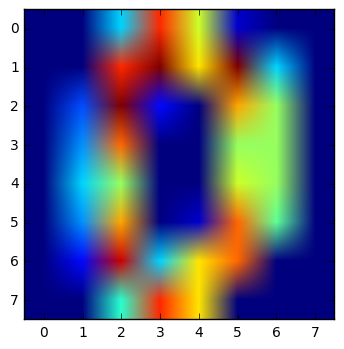

In [10]:
# display image (matplotlib automatically adds a color map and interpolates colors)
plt.imshow(digits.images[0])

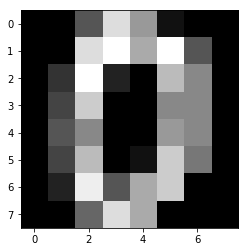

In [15]:
# show image in grayscale
plt.imshow(digits.images[0],cmap=plt.cm.gray, interpolation='nearest')

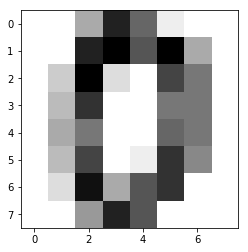

In [16]:
# show image in grayscale
plt.imshow(digits.images[0],cmap=plt.cm.gray_r, interpolation='nearest')

In [13]:
# IPython widgets - a collection of interactive tools for IPython/jupyter
# Read more: https://github.com/ipython/ipywidgets
from ipywidgets import interact

In [14]:
# auxiliary function for the widget
def display_digit(i):
    plt.imshow(digits.images[i],cmap=plt.cm.gray_r, interpolation='nearest')
    plt.gca().set_title('label:' + str(digits.target[i]))

In [17]:
# the function 'display_k' is executed with the selected value of the parameter 'k' 
interact(display_digit, i=(0,1796))

NameError: name 'display_digit' is not defined

In [18]:
X = digits.data
X.shape

(1797, 64)

In [19]:
Y = digits.target
Y.shape

(1797,)

___

# Exercise: classification

1. Use the dataset digits to create a classifier that recognizes digits. 
2. Using cross validation, evaluate the quality of the classifier. What is the average error rate?
3. Split the data into a training and test sets and train a classifier on the training set. Choose one of the points in the test set, predict its value, and compare it with the true label. Plot the respective observation (image).
___

In [44]:
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# write solution here

clf = svm.SVC(kernel='linear')#, gamma=0.001)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

clf_rf = RandomForestClassifier(n_estimators= 5, max_depth=3)
clf_rf_scores = cross_val_score(clf_rf, X, Y, cv=5)
print(clf_rf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_rf_scores.mean(), scores.std()))

[ 1.   0.9  1.   1.   0.9]
Accuracy: 0.95 (+/- 0.02)
[ 0.7  0.6  0.7  0.8  0.7]
Accuracy: 0.69 (+/- 0.02)


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


### Example: using support vector machines

In [21]:
#clf = svm.SVC(gamma=0.001)
#clf = svm.SVC(kernel='poly', degree=2)#, gamma=0.001)
clf = svm.SVC(kernel='linear')#, gamma=0.001)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 1.   0.9  1.   1.   0.9]
Accuracy: 0.95 (+/- 0.02)


<BR><BR><BR><BR><BR><BR><BR>
# (2) Using clustering to identify images

In [27]:
# run the K-Means algorithm to find cluster / group of similar observations in the data
kmeans = cluster.KMeans(n_clusters=10).fit(X)

In [28]:
# find the cluster of each observation
clusters = kmeans.predict(X)

In [29]:
# did the clustering work? 
clusters[:10]

array([3, 9, 9, 6, 2, 1, 5, 8, 1, 1], dtype=int32)

In [30]:
interact(display_digit, i=(0,1796));

NameError: name 'display_digit' is not defined

In [31]:
# did the clustering do a better job here? 
clusters[10:20]

array([3, 4, 0, 6, 2, 7, 5, 8, 9, 1], dtype=int32)

In [32]:
np.unique(clusters[10:20])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [33]:
# map cluster identifiers to digits
list(zip(clusters[10:20],range(10)))

[(3, 0),
 (4, 1),
 (0, 2),
 (6, 3),
 (2, 4),
 (7, 5),
 (5, 6),
 (8, 7),
 (9, 8),
 (1, 9)]

In [34]:
# store the mapping in the variable cluster_mapping
cluster_mapping = dict(zip(clusters[10:20],range(10)))
cluster_mapping

{0: 2, 1: 9, 2: 4, 3: 0, 4: 1, 5: 6, 6: 3, 7: 5, 8: 7, 9: 8}

In [35]:
# use clustering to infer the label of each observation
classes = list(map(lambda k:cluster_mapping[k], kmeans.labels_))
print('True label:', Y[:20].tolist())
print('Prediction:', classes[:20])

True label: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Prediction: [0, 8, 8, 3, 4, 9, 6, 7, 9, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


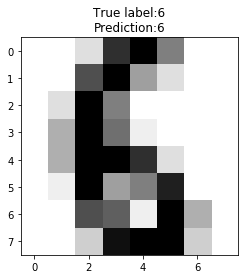

In [36]:
# auxiliary function for the widget
def display_digit(i):
    plt.imshow(digits.images[i],cmap=plt.cm.gray_r, interpolation='nearest')
    plt.gca().set_title('True label:' + str(Y[i]) + '\nPrediction:' + str(classes[i]))

interact(display_digit, i=(0,1796));

In [30]:
# correctly identified observations
(Y==classes).sum()

1421

In [31]:
Y.shape[0]

1797

In [32]:
# accuracy
(Y==classes).sum() / Y.shape[0]

0.79076238174735669

In [45]:
# K-Means centroids (revisit later)
kmeans.cluster_centers_

array([[  0.0e+00,   9.4e-01,   1.0e+01,   1.4e+01,   7.8e+00,   9.8e-01,
         -1.3e-15,  -2.8e-16,   2.3e-02,   5.2e+00,   1.4e+01,   1.3e+01,
          1.2e+01,   3.3e+00,   1.7e-02,   3.6e-16,   1.1e-02,   4.6e+00,
          8.1e+00,   6.1e+00,   1.2e+01,   3.6e+00,   1.7e-02,   6.9e-17,
         -2.8e-18,   9.9e-01,   2.8e+00,   7.0e+00,   1.3e+01,   2.6e+00,
          4.0e-02,  -5.6e-18,   0.0e+00,   4.5e-02,   1.6e+00,   9.9e+00,
          1.1e+01,   1.4e+00,  -7.1e-15,   0.0e+00,  -2.3e-17,   2.5e-01,
          4.4e+00,   1.1e+01,   7.8e+00,   2.4e+00,   8.5e-01,   1.1e-02,
         -2.3e-17,   1.2e+00,   1.1e+01,   1.4e+01,   1.2e+01,   1.1e+01,
          7.7e+00,   1.1e+00,  -1.4e-18,   9.3e-01,   1.0e+01,   1.4e+01,
          1.4e+01,   1.2e+01,   8.9e+00,   2.9e+00],
       [  0.0e+00,   1.9e-01,   6.6e+00,   1.3e+01,   1.2e+01,   5.8e+00,
          6.7e-01,   8.0e-03,   4.0e-03,   2.6e+00,   1.4e+01,   9.2e+00,
          9.4e+00,   1.0e+01,   1.3e+00,   4.0e-03,  -1.6e-

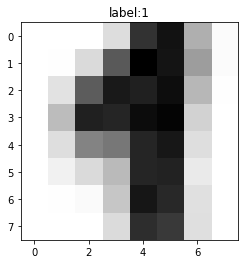

In [46]:
# plot the means of K-Means
def display_digit(i):
    plt.imshow(kmeans.cluster_centers_[i].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.gca().set_title('label:' + str(cluster_mapping[i]))
    
interact(display_digit, i=(0,9));

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
# (3) K-means

## (3.1) Simple example

In [47]:
# load 2-dimensional data from file
df = pd.read_csv('kmeans_simple.csv')
df.head()

,x1,x2
0,0.850095,9.004129
1,1.981194,9.040775
2,0.422453,9.171126
3,0.756533,8.627497
4,1.767426,9.926102


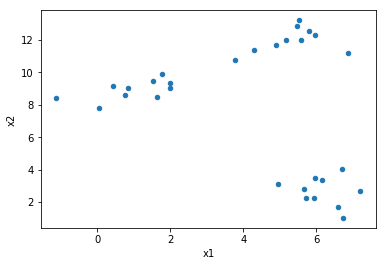

In [48]:
# visualize data
df.plot.scatter('x1','x2')

In [37]:
# assume there are 3 clusters
k=3

### Step 1: Random assignment of labels

         x1        x2  class
0  0.850095  9.004129      2
1  1.981194  9.040775      2
2  0.422453  9.171126      2
3  0.756533  8.627497      2
4  1.767426  9.926102      2


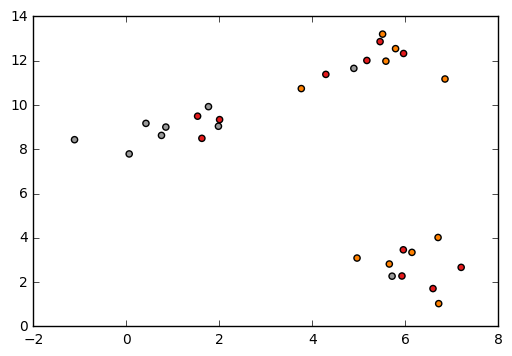

In [38]:
# assign labels randomly
df['class']=np.random.choice([0,1,2],df.shape[0])

# print dataframe
print(df.head())

# plot
plt.scatter(df['x1'],df['x2'],c=df['class'],cmap=plt.get_cmap('Set1'))

### Step 2a: compute centers of each cluster

In [39]:
centroids = df.groupby('class').agg(np.mean)
centroids

,x1,x2
class,,
0,4.702872,7.821339
1,5.768544,7.394537
2,1.703958,8.435505


In [40]:
centroids.reset_index(level=0, inplace=True)
centroids

,class,x1,x2
0,0,4.702872,7.821339
1,1,5.768544,7.394537
2,2,1.703958,8.435505


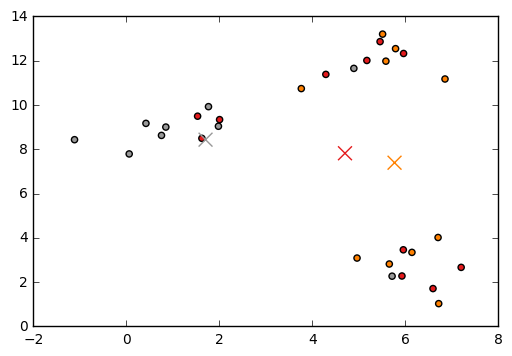

In [41]:
# plot observations
plt.scatter(df['x1'],df['x2'],c=df['class'],cmap=plt.get_cmap('Set1'))

# plot centroids
plt.scatter(centroids['x1'],centroids['x2'],c=centroids['class'],cmap=plt.get_cmap('Set1'),marker='x',s=100)

### Step 2b: update clusters assignment (centroids are fixed)

In [42]:
# update labels
for i in range(df.shape[0]):
    min_distance = 10**10
    for c in range(centroids.shape[0]):
        d = distance.euclidean(df.ix[i,['x1','x2']],centroids.ix[c,['x1','x2']])
        if d<min_distance:
            min_distance = d
            df.ix[i,'class']=centroids.ix[c,'class']

In [43]:
# print dataframe
df.head()

,x1,x2,class
0,0.850095,9.004129,2
1,1.981194,9.040775,2
2,0.422453,9.171126,2
3,0.756533,8.627497,2
4,1.767426,9.926102,2


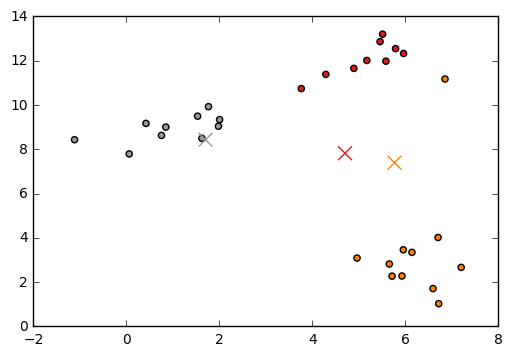

In [44]:
# plot observations
plt.scatter(df['x1'],df['x2'],c=df['class'],cmap=plt.get_cmap('Set1'))

# plot centroids
plt.scatter(centroids['x1'],centroids['x2'],c=centroids['class'],cmap=plt.get_cmap('Set1'),marker='x',s=100)

### Step 2a: compute centers of each cluster

In [45]:
# update centroids
centroids = df.groupby('class').agg(np.mean)
centroids.reset_index(level=0, inplace=True)

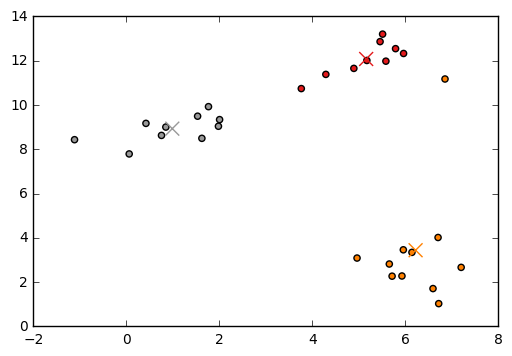

In [46]:
# plot centroids
plt.scatter(df['x1'],df['x2'],c=df['class'],cmap=plt.get_cmap('Set1'))
plt.scatter(centroids['x1'],centroids['x2'],c=centroids['class'],cmap=plt.get_cmap('Set1'),marker='x',s=100)

### Step 2b: update clusters assignment (centroids are fixed)

In [47]:
# update labels
for i in range(df.shape[0]):
    min_distance = 10**10
    for c in range(centroids.shape[0]):
        d = distance.euclidean(df.ix[i,['x1','x2']],centroids.ix[c,['x1','x2']])
        if d<min_distance:
            min_distance = d
            df.ix[i,'class']=centroids.ix[c,'class']

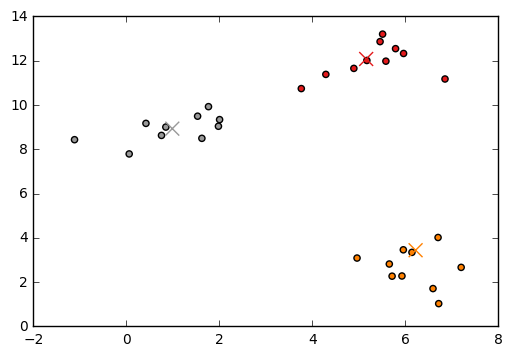

In [48]:
# plot
plt.scatter(df['x1'],df['x2'],c=df['class'],cmap=plt.get_cmap('Set1'))
plt.scatter(centroids['x1'],centroids['x2'],c=centroids['class'],cmap=plt.get_cmap('Set1'),marker='x',s=100)

### Step 2a: compute centers of each cluster

In [49]:
# update centroids
centroids = df.groupby('class').agg(np.mean)
centroids.reset_index(level=0, inplace=True)

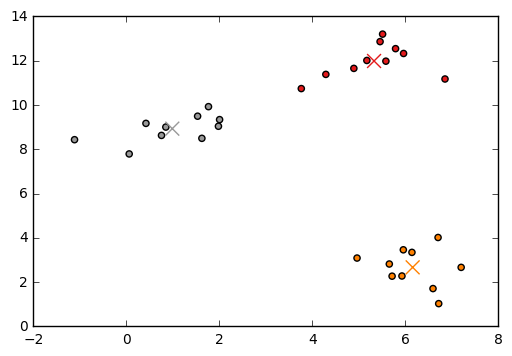

In [50]:
# plot centroids
plt.scatter(df['x1'],df['x2'],c=df['class'],cmap=plt.get_cmap('Set1'))
plt.scatter(centroids['x1'],centroids['x2'],c=centroids['class'],cmap=plt.get_cmap('Set1'),marker='x',s=100)

### Applying K-Means using scikit-learn
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [51]:
df = pd.read_csv('kmeans_simple.csv')
df.head()

,x1,x2
0,0.850095,9.004129
1,1.981194,9.040775
2,0.422453,9.171126
3,0.756533,8.627497
4,1.767426,9.926102


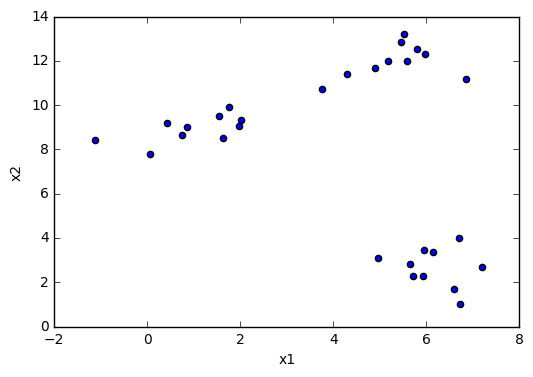

In [52]:
df.plot.scatter('x1','x2')

In [53]:
# run K-Means with 3 clusters
kmeans = cluster.KMeans(n_clusters=3).fit(df)

In [54]:
# extract labels
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [55]:
df['class']=kmeans.labels_

In [56]:
df.head()

,x1,x2,class
0,0.850095,9.004129,0
1,1.981194,9.040775,0
2,0.422453,9.171126,0
3,0.756533,8.627497,0
4,1.767426,9.926102,0


In [57]:
# plot centroids
kmeans.cluster_centers_

array([[  1. ,   8.9],
       [  6.2,   2.7],
       [  5.3,  12. ]])

In [58]:
# convert to a dataframe
centroids = pd.DataFrame(data=kmeans.cluster_centers_,columns=['x1','x2'])
centroids['class']=range(centroids.shape[0])
centroids

,x1,x2,class
0,0.989121,8.932627,0
1,6.158143,2.668879,1
2,5.328001,11.988459,2


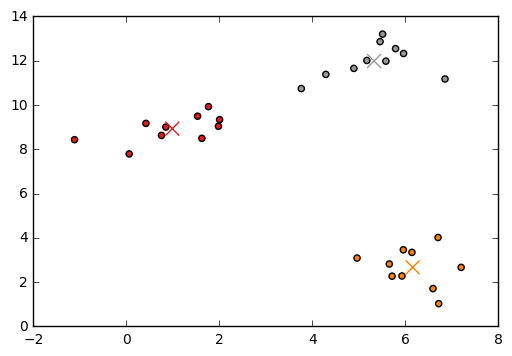

In [59]:
# plot observations
plt.scatter(df['x1'],df['x2'],c=df['class'],cmap=plt.get_cmap('Set1'))

# plot centroids
plt.scatter(centroids['x1'],centroids['x2'],c=centroids['class'],cmap=plt.get_cmap('Set1'),marker='x',s=100)

<br><br><br><br><br><br><br><br><br><br><br>

## (3.2) Image segmentation

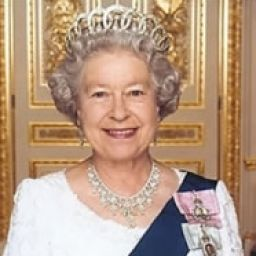

In [60]:
Image("queen.jpg")

In [61]:
# load image to numpy array
a0 = misc.imread("queen.jpg",mode='RGB')

In [62]:
# a 256x256 pixel array. Each pixel is represented by three values
e

(256, 256, 3)

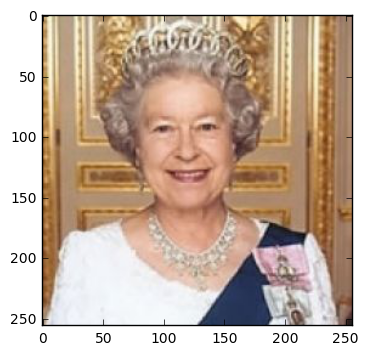

In [63]:
# display pixel array
plt.imshow(a0)

In [64]:
# export pixel array to file
misc.imsave("queen2.jpg",a0)

In [65]:
# inspect 1 pixel at location (0,0)
a0[0,0,:]

array([179, 138,  86], dtype=uint8)

In [66]:
# inspect 1 pixel at location (100,100)
a0[100,100,:]

array([240, 194, 178], dtype=uint8)

In [67]:
a0.shape

(256, 256, 3)

In [68]:
rows,cols,depth=a0.shape

In [69]:
# reshape array to a two dimensional array, each row corresponding to a pixel, each column corresponding to RGB values
a1 = a0.reshape(rows*cols,depth)

In [70]:
a1.shape

(65536, 3)

In [71]:
# first pixel
a1[0,:] 

array([179, 138,  86], dtype=uint8)

In [72]:
# pixel at location 100,100
a1[cols*100+100,:]

array([240, 194, 178], dtype=uint8)

In [73]:
# cluster the data into 2 groups
kmeans = cluster.KMeans(n_clusters=2).fit(a1)

In [74]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [75]:
np.unique(kmeans.labels_)

array([0, 1])

In [76]:
kmeans.cluster_centers_

array([[ 228. ,  209.7,  196.5],
       [ 160.7,  125.4,   96.8]])

In [77]:
# convert colors to values in 0-255, otherwise, matplotlib automatically rescales values
kmeans.cluster_centers_.astype(np.uint8)

array([[227, 209, 196],
       [160, 125,  96]], dtype=uint8)

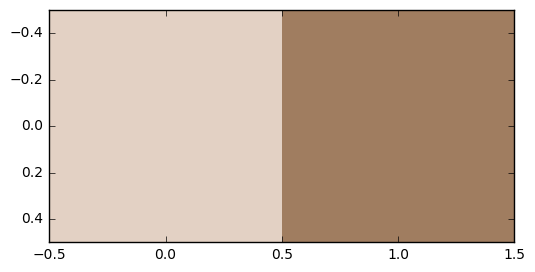

In [78]:
plt.imshow([kmeans.cluster_centers_.astype(np.uint8)], interpolation='nearest',)

In [79]:
# generate quantized image
a2 = np.array([kmeans.cluster_centers_[c,:] for c in kmeans.predict(a1)]).reshape((rows,cols,depth))

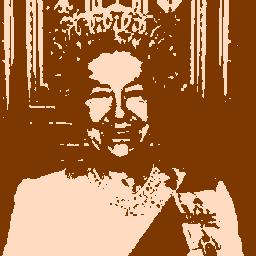

In [80]:
# save as jpg
misc.imsave('queen_quantized.jpg',a2)

# display
Image('queen_quantized.jpg')

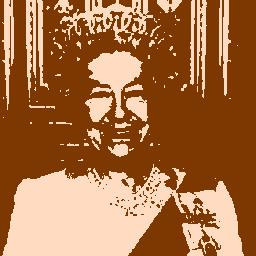

In [81]:
# entire code in a single place
a0 = misc.imread('queen.jpg',mode='RGB')
rows,cols,depth = a0.shape
a1 = a0.reshape(rows*cols,depth)
kmeans = cluster.KMeans(n_clusters=2).fit(a1)
a2 = np.array([kmeans.cluster_centers_[c,:] for c in kmeans.predict(a1)]).reshape((rows,cols,depth))
misc.imsave('queen_quantized.jpg',a2)
Image('queen_quantized.jpg')

In [82]:
# try different cluster numbers
a0 = misc.imread('queen.jpg',mode='RGB')
rows,cols,depth = a0.shape
a1 = a0.reshape(rows*cols,depth)
for k in range(1,11):
    kmeans = cluster.KMeans(n_clusters=k).fit(a1)
    a2 = np.array([kmeans.cluster_centers_[c,:] for c in kmeans.predict(a1)]).reshape((rows,cols,depth))
    misc.imsave("queen_k%d.jpg"%k,a2)

In [83]:
# auxiliary function for the widget
def display_k(k):
    plt.imshow(misc.imread("queen_k%d.jpg"%k,mode='RGB'))

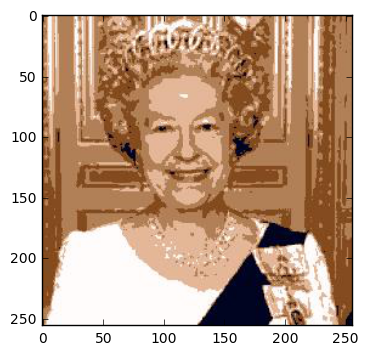

In [84]:
# the function 'display_k' is executed with the selected value of the parameter 'k' 
interact(display_k, k=(1,10));

# (4) Hierarchical clustering 
## (4.1) Simple example

In [85]:
# initalize data for clustering
X = np.array([[1,3],[1,1],[2,1],[11,8],[11,11],[10,11]]) # 6 datapoints
X

array([[ 1,  3],
       [ 1,  1],
       [ 2,  1],
       [11,  8],
       [11, 11],
       [10, 11]])

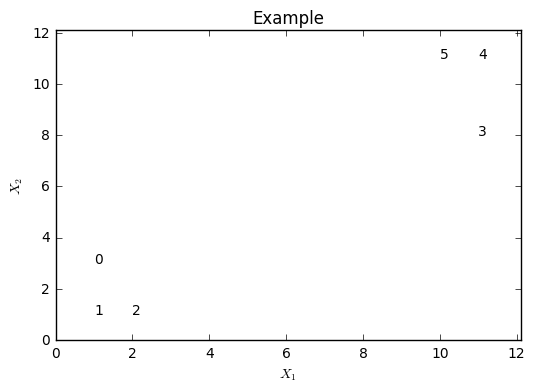

In [86]:
# plot data
fig,ax = plt.subplots()
for i in range(X.shape[0]):
    ax.text(X[i,0],X[i,1],s=str(i))
ax.set_xlim([0,X[:,0].max()*1.1])
ax.set_ylim([0,X[:,1].max()*1.1])
ax.set_title('Example')
ax.set_xlabel("$X_1$")
ax.set_ylabel('$X_2$')

In [87]:
# compute distance between points
distance_matrix = scipy.spatial.distance.pdist(X)
distance_matrix

array([  2. ,   2.2,  11.2,  12.8,  12. ,   1. ,  12.2,  14.1,  13.5,
        11.4,  13.5,  12.8,   3. ,   3.2,   1. ])

In [88]:
# present distances as a matrix
print(scipy.spatial.distance.squareform(distance_matrix))

[[  0.    2.    2.2  11.2  12.8  12. ]
 [  2.    0.    1.   12.2  14.1  13.5]
 [  2.2   1.    0.   11.4  13.5  12.8]
 [ 11.2  12.2  11.4   0.    3.    3.2]
 [ 12.8  14.1  13.5   3.    0.    1. ]
 [ 12.   13.5  12.8   3.2   1.    0. ]]


In [89]:
# perform hierarchical clustering (use minimal distance)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
Z = hierarchy.linkage(distance_matrix,method='single',metric='euclidean')
Z

array([[  1. ,   2. ,   1. ,   2. ],
       [  4. ,   5. ,   1. ,   2. ],
       [  0. ,   6. ,   2. ,   3. ],
       [  3. ,   7. ,   3. ,   3. ],
       [  8. ,   9. ,  11.2,   6. ]])

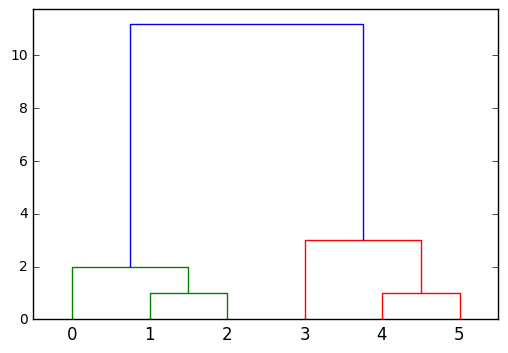

In [90]:
# plot dendrogram
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
dn = hierarchy.dendrogram(Z)
#dn = hierarchy.dendrogram(Z,color_threshold=1.5)

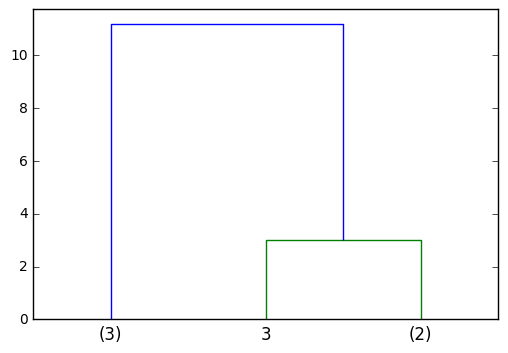

In [91]:
# plot dendrogram
dn = hierarchy.dendrogram(Z,p=3,truncate_mode='lastp')

References
- Hierarchical clustering: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
- Computing distances between points: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
- Plotting: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

In [92]:
# cut dendrogram to clusters
T = hierarchy.cut_tree(Z, n_clusters=[3])
T

array([[0],
       [0],
       [0],
       [1],
       [2],
       [2]])

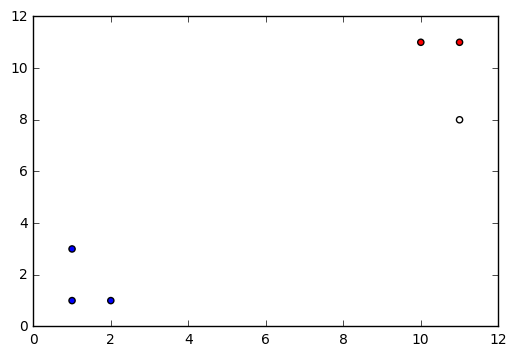

In [93]:
plt.scatter(X[:,0],X[:,1],c=T,cmap=plt.get_cmap('bwr'))

## (4.2) Example 2 - movies clustering

In [94]:
!head movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller


In [95]:
df_movies = pd.read_csv('movies.dat', sep="::", engine='python',header=None,names=['ID','Title','Genres'])

In [96]:
df_movies.head()

,ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [97]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
ID        3883 non-null int64
Title     3883 non-null object
Genres    3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [98]:
df_movies['Genres'].str.get_dummies(sep='|')

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [99]:
df_genres = df_movies['Genres'].str.get_dummies(sep='|')

In [100]:
df_genres

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


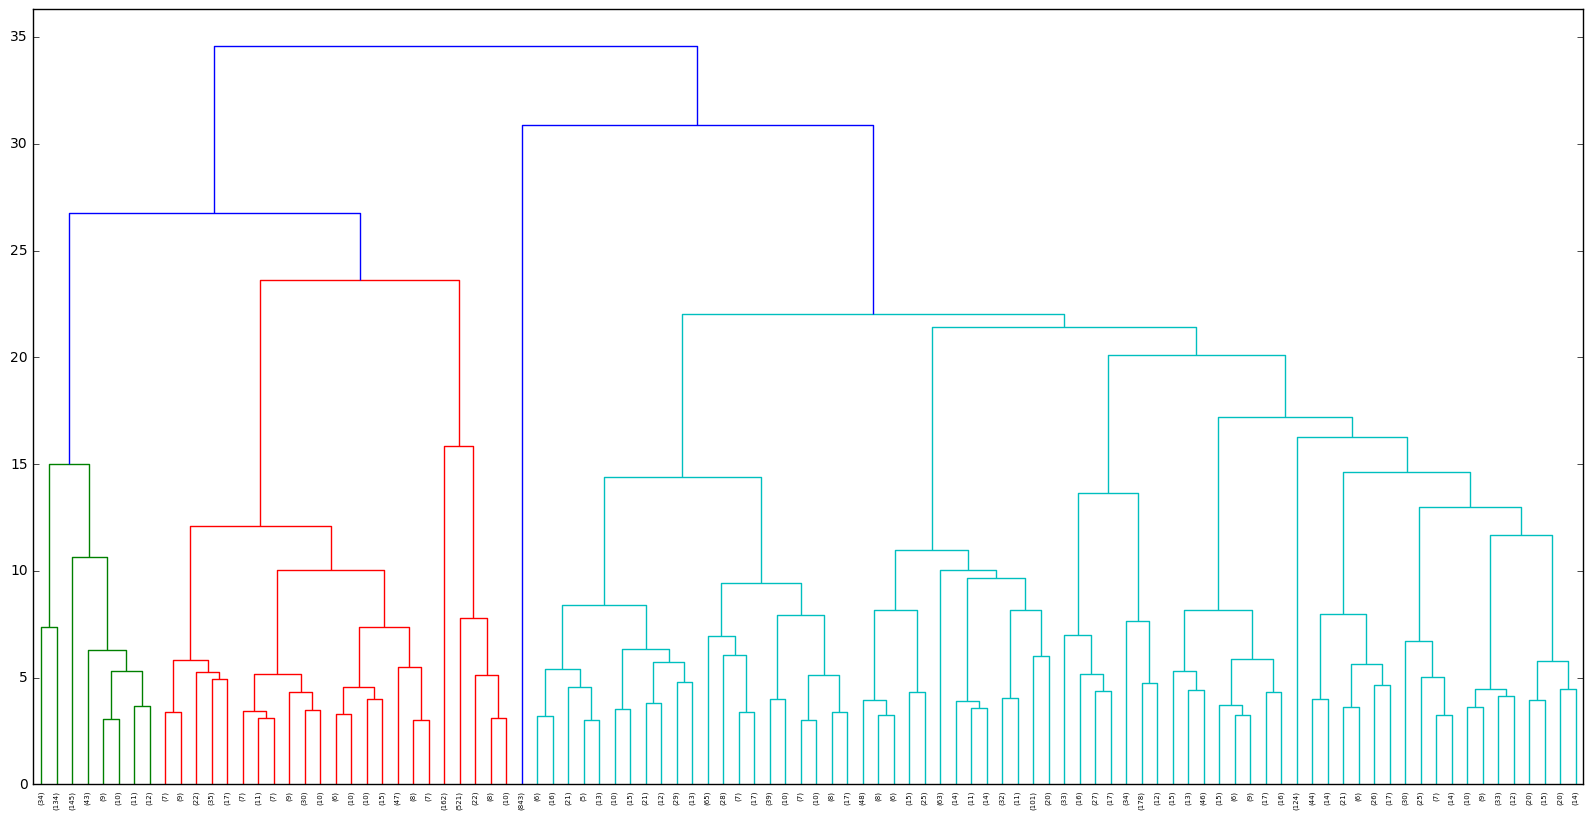

In [101]:
# compute distances between points (movies)
distance_matrix = scipy.spatial.distance.pdist(df_genres, metric='euclidean')

# create hierarchical clustering
Z = hierarchy.linkage(distance_matrix,method='ward')#,metric='euclidean')

# plot dendrogram
plt.figure(figsize=(20,10)) 
dn = hierarchy.dendrogram(Z,p=100,truncate_mode='lastp')

In [102]:
# generate clusters
T = hierarchy.cut_tree(Z, n_clusters=10)
T

array([[0],
       [0],
       [1],
       ..., 
       [6],
       [6],
       [3]])

In [103]:
# example for classification of movies
df_movies['Class']=T[:,0]
df_movies.head(10)

,ID,Title,Genres,Class
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1
3,4,Waiting to Exhale (1995),Comedy|Drama,2
4,5,Father of the Bride Part II (1995),Comedy,2
5,6,Heat (1995),Action|Crime|Thriller,3
6,7,Sabrina (1995),Comedy|Romance,1
7,8,Tom and Huck (1995),Adventure|Children's,0
8,9,Sudden Death (1995),Action,4
9,10,GoldenEye (1995),Action|Adventure|Thriller,4


In [104]:
# movies in class 0
df_movies[df_movies['Class']==0].head()

,ID,Title,Genres,Class
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0
7,8,Tom and Huck (1995),Adventure|Children's,0
12,13,Balto (1995),Animation|Children's,0
33,34,Babe (1995),Children's|Comedy|Drama,0


In [105]:
# movies in class 9
df_movies[df_movies['Class']==9].head()

,ID,Title,Genres,Class
40,41,Richard III (1995),Drama|War,9
108,110,Braveheart (1995),Action|Drama|War,9
149,151,Rob Roy (1995),Drama|Romance|War,9
153,155,Beyond Rangoon (1995),Drama|War,9
155,157,Canadian Bacon (1994),Comedy|War,9


In [106]:
# merge generes with clustering output
df_classes = pd.concat([df_genres,pd.Series(T[:,0],name='Class')],axis=1)

# analyze summary statistics for each cluster
pd.pivot_table(data=df_classes,index='Class',aggfunc=np.mean)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Class,,,,,,,,,,,,,,,,,,
0,0.041199,0.288390,0.378277,0.872659,0.385768,0.003745,0.000000,0.086142,0.179775,0.003745,0.003745,0.161049,0.003745,0.022472,0.056180,0.011236,0.003745,0.000000
1,0.060302,0.000000,0.000000,0.000000,0.467337,0.010050,0.000000,0.444724,0.010050,0.002513,0.007538,0.000000,0.020101,1.000000,0.007538,0.072864,0.002513,0.000000
2,0.042877,0.024896,0.000000,0.000000,1.000000,0.000000,0.000000,0.225450,0.000000,0.000000,0.000000,0.000000,0.000000,0.006916,0.000000,0.000000,0.000000,0.000000
3,0.211957,0.000000,0.000000,0.000000,0.059783,0.076087,0.000000,0.211957,0.000000,0.105978,0.127717,0.000000,0.046196,0.000000,0.146739,0.937500,0.000000,0.000000
4,0.813008,0.474255,0.008130,0.027100,0.054201,0.111111,0.000000,0.257453,0.043360,0.000000,0.065041,0.000000,0.008130,0.046070,0.254743,0.116531,0.000000,0.010840
5,0.000000,0.003155,0.000000,0.009464,0.160883,0.006309,0.000000,0.088328,0.000000,0.000000,0.810726,0.006309,0.000000,0.006309,0.299685,0.003155,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.041543,0.000000,0.000000,0.011869,0.216617,0.400593,0.005935,0.350148,0.000000,0.008902,0.032641,0.204748,0.228487,0.077151,0.011869,0.186944,0.011869,0.189911
8,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,1.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


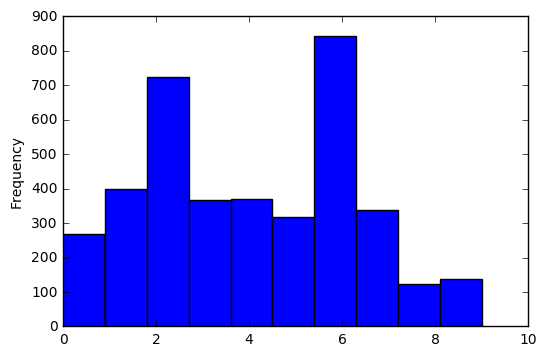

In [107]:
# plot size of each class
df_movies['Class'].plot.hist()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
# (5) Mixture models

## (5.1) Univariate normal distribution

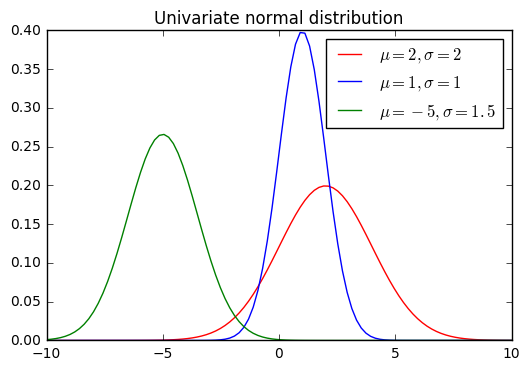

In [108]:
x = np.linspace(-10,10,100)
plt.plot(x, stats.norm.pdf(x,loc=2,scale=2),'r-',label='$\mu=2,\sigma=2$')#, lw=5, alpha=0.6, label='norm pdf')
plt.plot(x, stats.norm.pdf(x,loc=1,scale=1),'b-',label='$\mu=1,\sigma=1$')#, lw=5, alpha=0.6, label='norm pdf')
plt.plot(x, stats.norm.pdf(x,loc=-5,scale=1.5),'g-',label='$\mu=-5,\sigma=1.5$')#, lw=5, alpha=0.6, label='norm pdf')
plt.gca().set_title('Univariate normal distribution')
plt.gca().legend()

## (5.2) Multivariate normal distribution

In [109]:
means = [1,3]
cov = [[1,0],[0,1]]
rv = stats.multivariate_normal(means, cov)

In [110]:
l=5
x, y = np.mgrid[-l:l:.05, -l:l:.05]

In [111]:
x.shape

(200, 200)

In [112]:
pos = np.dstack((x, y))
pos.shape

(200, 200, 2)

In [113]:
z = rv.pdf(pos)

In [114]:
z.shape

(200, 200)

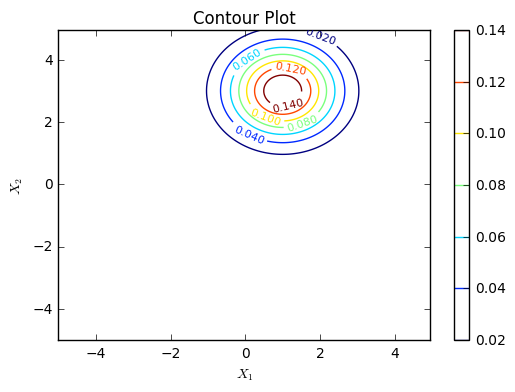

In [115]:
#plt.figure(figsize=(5,5))
cp = plt.contour(x, y, z)
plt.clabel(cp, inline=True, fontsize=8)
plt.title('Contour Plot')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar(cp)

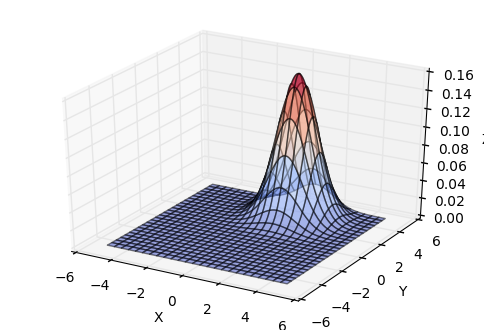

In [116]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm)#plt.get_cmap('bwr'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [117]:
# probabilities
print(z.min(),z.max())

3.06970072291e-23 0.159154943092


In [118]:
# -log(probabilities)
print(-np.log(z.min()),-np.log(z.max()))

51.8378770664 1.83787706641


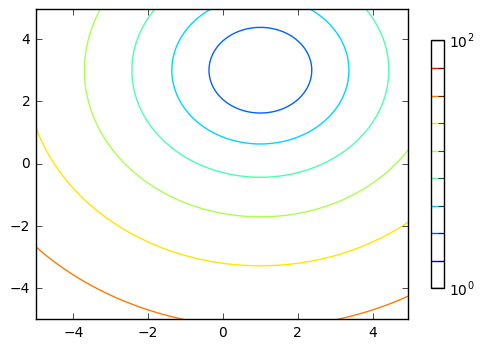

In [119]:
z_log = -np.log(z)
CS = plt.contour(x, y, z_log, norm=LogNorm(vmin=1.0, vmax=100.0),levels=np.logspace(0, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
#plt.scatter(df['x1'], df['x2'], .8)

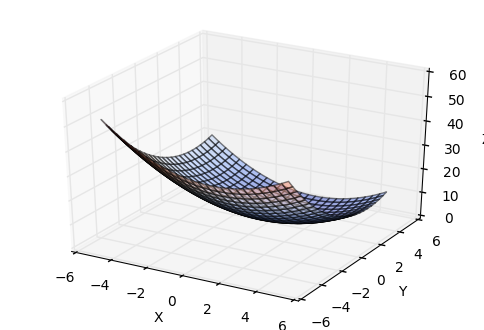

In [120]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z_log, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm)#plt.get_cmap('bwr'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## (5.3) Mixture model

In [121]:
# model 1
means1 = [1,3]
cov1 = [[1,0],[0,1]]
rv1 = stats.multivariate_normal(means1, cov1)

# model 2
means2 = [-2,-2]
cov2 = [[1,0],[0,1]]
rv2 = stats.multivariate_normal(means2, cov2)

# 
l=5
x, y = np.mgrid[-l:l:.05, -l:l:.05]
pos = np.dstack((x, y))
z = 0.3*rv1.pdf(pos) + 0.7*rv2.pdf(pos)

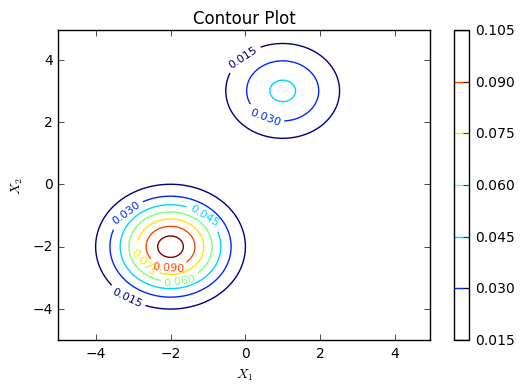

In [122]:
cp = plt.contour(x, y, z)
plt.clabel(cp, inline=True, fontsize=8)
plt.title('Contour Plot')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar(cp)


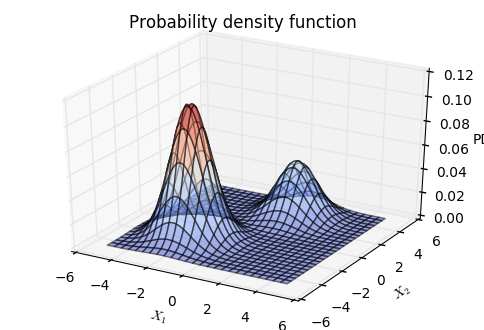

In [123]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm)#plt.get_cmap('bwr'))
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('PDF')
ax.set_title('Probability density function')

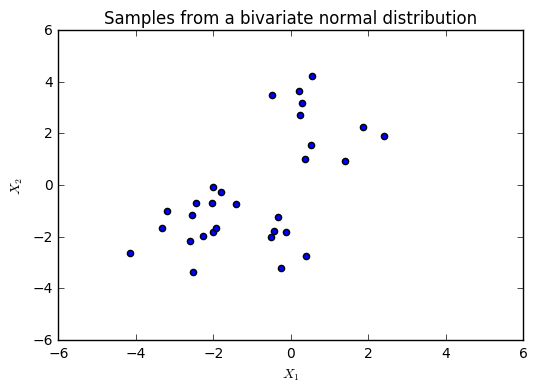

In [124]:
# generate samples from mixture model
n=30
pi=[0.3,0.7]
n1,n2=np.random.multinomial(n,pi)
means1 = [1,3]
cov1 = [[1,0],[0,1]]
means2 = [-2,-2]
cov2 = [[1,0],[0,1]]

x1 = np.random.multivariate_normal(means1, cov1, n1)
x2 = np.random.multivariate_normal(means2, cov2, n2)
x = np.concatenate([x1,x2],axis=0)
plt.scatter(x[:,0],x[:,1])
plt.gca().set_xlim([-6,6])
plt.gca().set_ylim([-6,6])
plt.gca().set_xlabel('$X_1$')
plt.gca().set_ylabel('$X_2$')
plt.gca().set_title('Samples from a bivariate normal distribution')

## (5.4) Fitting a mixture model

         x1        x2
0  0.850095  9.004129
1  1.981194  9.040775
2  0.422453  9.171126
3  0.756533  8.627497
4  1.767426  9.926102


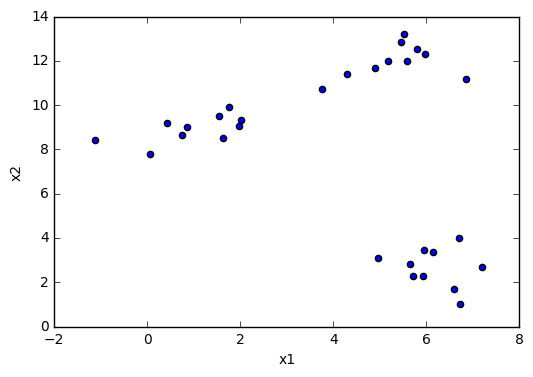

In [125]:
# load 2-dimensional data from file
df = pd.read_csv('kmeans_simple.csv')
print(df.head())
df.plot.scatter('x1','x2')

In [126]:
clf = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter =1000)#,init_params ='random')
clf.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [127]:
x1, y1 = np.mgrid[-2:8:.05, -2:20:.05]
XY = np.vstack([x1.ravel(), y1.ravel()]).T
print(x1.shape, y1.shape,XY.shape)

(200, 440) (200, 440) (88000, 2)


In [128]:
z1 = -clf.score_samples(XY)
z1.shape

(88000,)

In [129]:
z1 = z1.reshape(x1.shape)
z1.shape

(200, 440)

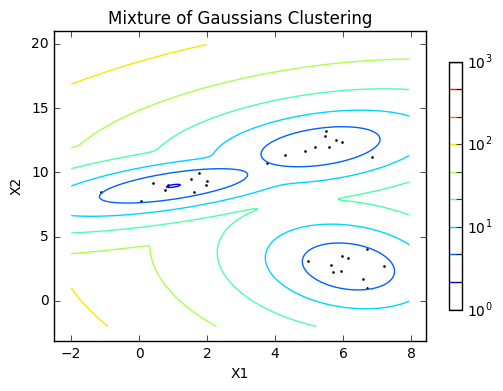

In [130]:
CS = plt.contour(x1, y1, z1, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(df['x1'], df['x2'], .8)
plt.gca().set_xlabel('X1')
plt.gca().set_ylabel('X2')
plt.gca().set_title('Mixture of Gaussians Clustering')

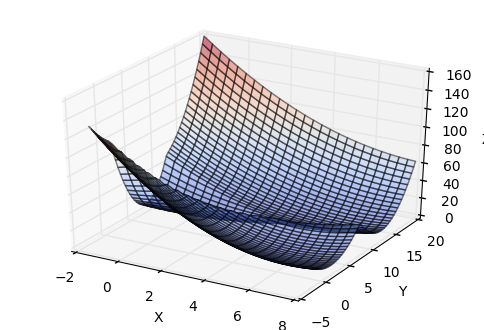

In [131]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, y1, z1, rstride=8, cstride=8, alpha=0.5, cmap=cm.coolwarm)#plt.get_cmap('bwr'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [132]:
clf.covariances_

array([[[ 0.9,  0.4],
        [ 0.4,  0.4]],

       [[ 0.4, -0.1],
        [-0.1,  0.7]],

       [[ 0.7,  0.2],
        [ 0.2,  0.5]]])

In [133]:
clf.means_

array([[  1. ,   8.9],
       [  6.2,   2.7],
       [  5.3,  12. ]])